# Data Analysis Comparison on Predicting Stroke Disease Using Decision Tree and SVM With CRISP-DM
Daffa Kaisha Pratama Chandra - 00000055770 <br>
IS311 EL - Data Analysis Final Exam

### Dataset overview:
According to the World Health Organization (WHO), stroke is the second most common cause of death worldwide, accounting for roughly 11% of all fatalities.
Based on input characteristics like gender, age, numerous diseases, and smoking status, this dataset is used to determine whether a patient is likely to get a stroke. Each row of the data contains pertinent patient information.

<b> Dataset source: <b> https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Import the Library

In [1]:
# Library for data processing (pandas) and linear algebra (numpy)
import pandas as pd 
import numpy as np 

# Library for visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Library to normalize data
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Library for train/test split
from sklearn.model_selection import train_test_split

# Library for Machine Learning Decision Tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# Library for Machine Learning SVM
from sklearn import svm

# Library for evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Understanding

### Dataset Column Information
1) id: unique identifier <br>
2) gender: "Male", "Female" or "Other" <br>
3) age: age of the patient <br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension <br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease <br>
6) ever_married: "No" or "Yes" <br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" <br>
8) Residence_type: "Rural" or "Urban" <br>
9) avg_glucose_level: average glucose level in blood <br>
10) bmi: body mass index <br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* <br>
12) stroke: 1 if the patient had a stroke or 0 if not <br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient
<br> <br>
### Read the Dataset

In [2]:
#Read the dataset and store it in df variable
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#Drop id column
df.drop('id', axis=1, inplace=True)

In [4]:
#Get the information of datatype that is used in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


From the information above, we know that this dataset contains both categorical and numerical data types

In [5]:
#Get how many columns and row from the dataset
print('The healthcare-dataset-stroke-data contain {0} rows and {1} columns'.format(df.shape[0], df.shape[1]))

The healthcare-dataset-stroke-data contain 5110 rows and 11 columns


In [6]:
#Basic statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


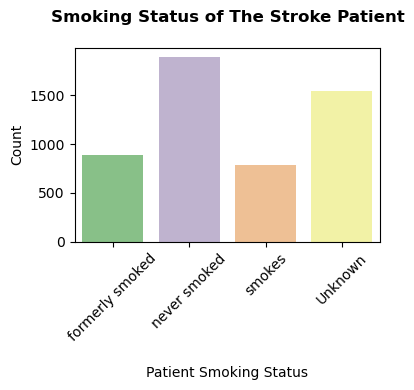

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [7]:
#Visualize how many the stroke patients who smoke
plt.figure(figsize=(4,4))
plot = sns.countplot(data=df, x='smoking_status', palette='Accent')
plt.title('Smoking Status of The Stroke Patient\n', loc='center', fontweight='bold')
plt.xlabel('\nPatient Smoking Status')
plt.ylabel('Count')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

#print the smoking status of the stroke patient
smoke = df['smoking_status'].value_counts()
print(smoke)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


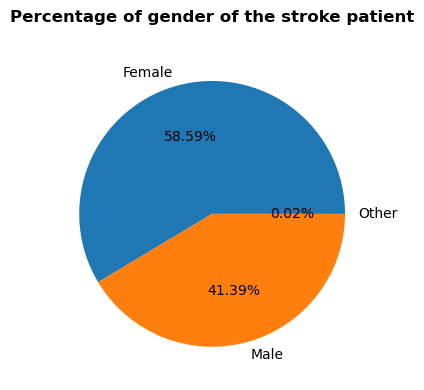

In [8]:
#Visualize the percentage of gender of the stroke patient using pie plot
plt.figure(figsize=(4,4))
gender = df['gender'].value_counts()
labels = ["Female", "Male", "Other"]
plt.pie(gender, labels=labels, colors=None, autopct='%.2f%%')
plt.title('Percentage of gender of the stroke patient\n', fontweight='bold')
plt.tight_layout()
print(gender)

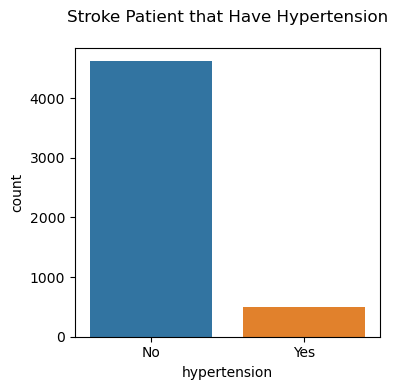

No     4612
Yes     498
Name: hypertension, dtype: int64


In [9]:
#Encoding data for visualization
df['hypertension'] = df['hypertension'].replace({0:"No",1:"Yes"})

#Visualize using countplot
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='hypertension')
plt.title('Stroke Patient that Have Hypertension\n')
plt.tight_layout()
plt.show()

#Show how many patient have hypertension
hypertension = df['hypertension'].value_counts()
print(hypertension)

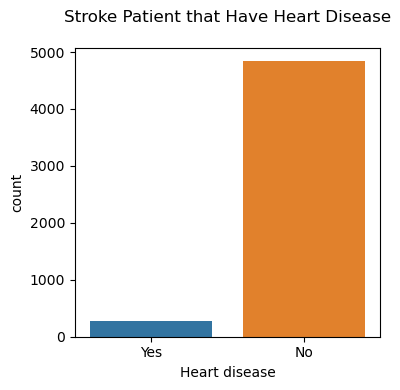

No     4834
Yes     276
Name: heart_disease, dtype: int64


In [10]:
#Encoding data for visualization
df['heart_disease'] = df['heart_disease'].replace({0:"No",1:"Yes"})

#Visualize using countplot
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='heart_disease')
plt.title('Stroke Patient that Have Heart Disease\n')
plt.xlabel('Heart disease')
plt.tight_layout()
plt.show()

#Show how many patient have heart disease
heart_disease = df['heart_disease'].value_counts()
print(heart_disease)

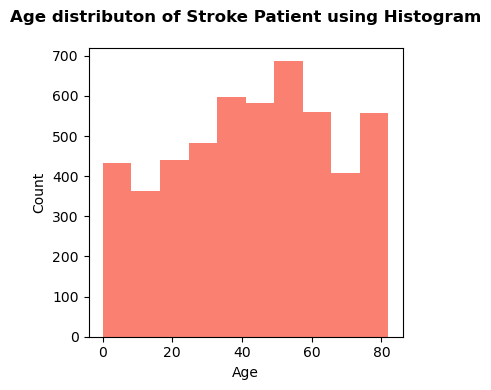

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64


In [11]:
#Visualize age distributon of Stroke Patient using Histogram
plt.figure(figsize=(4,4))
plt.hist(df['age'], color='salmon')
plt.title('Age distributon of Stroke Patient using Histogram\n', fontweight='bold', loc='center', )
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#print the age distribution
age = df['age'].value_counts()
print(age)

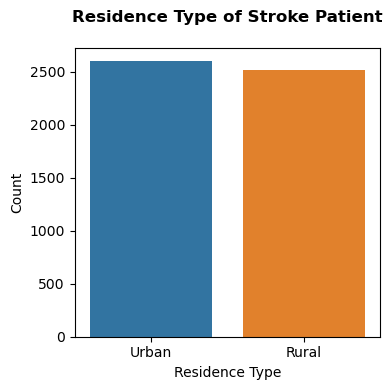

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


In [12]:
#Visualize the residence type of Stroke Patient
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='Residence_type')
plt.title('Residence Type of Stroke Patient\n', fontweight='bold')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#
r_type = df['Residence_type'].value_counts()
print(r_type)

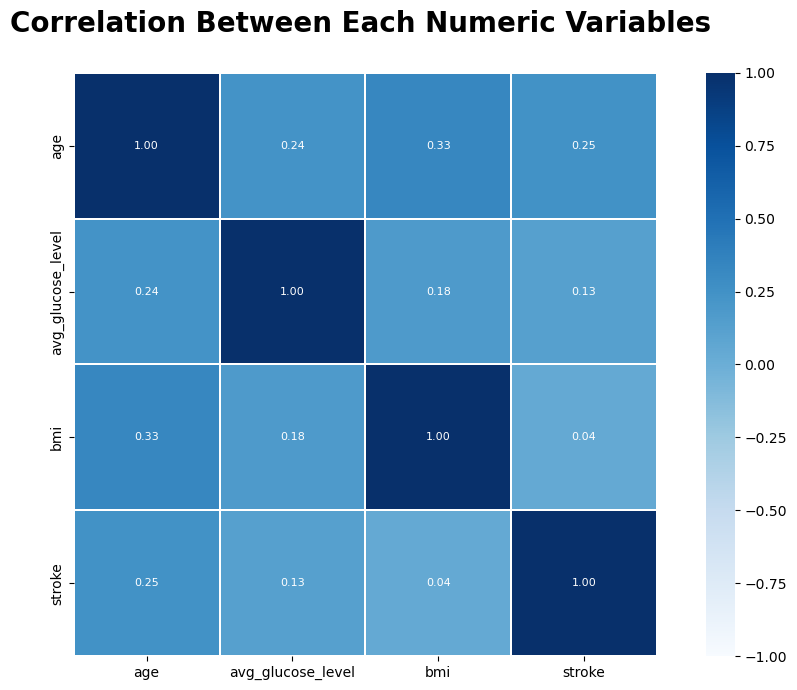

In [13]:
# Visualize the correlation between each variables
corr = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "Blues", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("Correlation Between Each Numeric Variables \n", fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

### Insights from the dataset:
1. Mostly of the stroke patient never smoke. <br>
2. Most of the stroke patient is female. <br>
3. Most of the stroke patient don't have hypertension. <br>
4. Most of the stroke patient don't have heart disease. <br>
5. The amount of the stroke patient that come from Urban/Rural is almost equal. <br>
6. Most stroke patients come from between age 40 – 60. <br>
7. The correlation between each numerical value is low.

## Data Preparation
Will check: <br>
1. Encoding the data that is used for visualization before <br>
2. Null values and handling it <br>
3. Outlier detection and handling it <br> 

#### Encoding

In [14]:
#Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 439.3+ KB


In [15]:
#Encode all object type column
df['gender'] = df['gender'].replace({"Male":0, "Female":1, "Other":2})
df['hypertension'] = df['hypertension'].replace({"No":0, "Yes":1})
df['heart_disease'] = df['heart_disease'].replace({"No":0, "Yes":1})
df['ever_married'] = df['ever_married'].replace({"No":0, "Yes":1})
df['work_type'] = df['work_type'].replace({"children":0, "Govt_job":1, "Never_worked":2, "Private":3, "Self-employed":4})
df['Residence_type'] = df['Residence_type'].replace({"Rural":0, "Urban":1})
df['smoking_status'] = df['smoking_status'].replace({"formerly smoked":0, "never smoked":1, "smokes": 2, "Unknown":3})

#check datatypes after encoding
print(df.info())

print("\n==========================\n")

#chech the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB
None




,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.6,0,1
1,1,61.0,0,0,1,4,0,202.21,NaN,1,1
2,0,80.0,0,1,1,3,0,105.92,32.5,1,1
3,1,49.0,0,0,1,3,1,171.23,34.4,2,1
4,1,79.0,1,0,1,4,0,174.12,24.0,1,1


#### Check null values

In [16]:
#Checking null value
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The dataset contains 201 null values on the BMI column <br>
We can eliminate the missing value by imputing the mean of the column.

In [17]:
#Imputing mean to the null values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

#Check null value again
print(df.isna().sum())

#Take a peek of the dataset
df.head()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.600000,0,1
1,1,61.0,0,0,1,4,0,202.21,28.893237,1,1
2,0,80.0,0,1,1,3,0,105.92,32.500000,1,1
3,1,49.0,0,0,1,3,1,171.23,34.400000,2,1
4,1,79.0,1,0,1,4,0,174.12,24.000000,1,1


#### Check outlier

In [18]:
#normalize avg_glucose_level
glucose_array = np.array(df['avg_glucose_level'])
normalized_glucose = preprocessing.normalize([glucose_array])
df['avg_glucose_level'] = pd.DataFrame(glucose_array)

#normalize bmi
bmi_array = np.array(df['bmi'])
normalized_bmi = preprocessing.normalize([bmi_array])
df['bmi'] = pd.DataFrame(bmi_array)

#check the dataset
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.600000,0,1
1,1,61.0,0,0,1,4,0,202.21,28.893237,1,1
2,0,80.0,0,1,1,3,0,105.92,32.500000,1,1
3,1,49.0,0,0,1,3,1,171.23,34.400000,2,1
4,1,79.0,1,0,1,4,0,174.12,24.000000,1,1


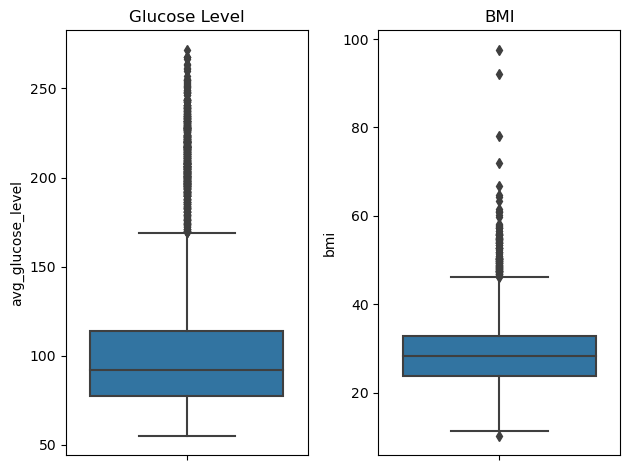

In [19]:
glucose_level = df['avg_glucose_level']
bmi = df['bmi']

#Boxplot
plt.subplot(1,2,1)
sns.boxplot(y = glucose_level)
plt.title('Glucose Level')

plt.subplot(1,2,2)
sns.boxplot(y = bmi)
plt.title('BMI')

plt.tight_layout()
plt.show()

From the graph above, we know that the column bmi and avg glucose level still have outlier. The outlier needed to be handled

In [20]:
#Detect outlier from avg_glucose_level column
Q1=glucose_level.quantile(0.25)
Q3=glucose_level.quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
outliers_glucose= glucose_level[((glucose_level<(lower_range)) | (glucose_level>(upper_range)))]

print('Number of outliers from avg_glucose_level column: ', len(outliers_glucose))
print('Max outlier value from avg_glucose_level column: ', outliers_glucose.max())
print('Min outlier value from avg_glucose_level column: ', outliers_glucose.min())
print(outliers_glucose)
print('\n')

#Detect outlier from bmi column
Q1=bmi.quantile(0.25)
Q3=bmi.quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
outliers_bmi= bmi[((bmi<(lower_range)) | (bmi>(upper_range)))]

print('Number of outliers from bmi column: ', len(outliers_bmi))
print('Max outlier value from bmi column: ', outliers_bmi.max())
print('Min outlier value from bmi column: ', outliers_bmi.min())
print(outliers_bmi)

Number of outliers from avg_glucose_level column:  627
Max outlier value from avg_glucose_level column:  271.74
Min outlier value from avg_glucose_level column:  169.43
0       228.69
1       202.21
3       171.23
4       174.12
5       186.21
         ...  
5061    223.78
5062    211.58
5063    179.38
5064    193.88
5076    174.37
Name: avg_glucose_level, Length: 627, dtype: float64


Number of outliers from bmi column:  126
Max outlier value from bmi column:  97.6
Min outlier value from bmi column:  10.3
21      48.9
66      47.5
113     56.6
254     50.1
258     54.6
        ... 
4906    54.1
4952    56.6
5009    49.5
5057    47.6
5103    46.9
Name: bmi, Length: 126, dtype: float64


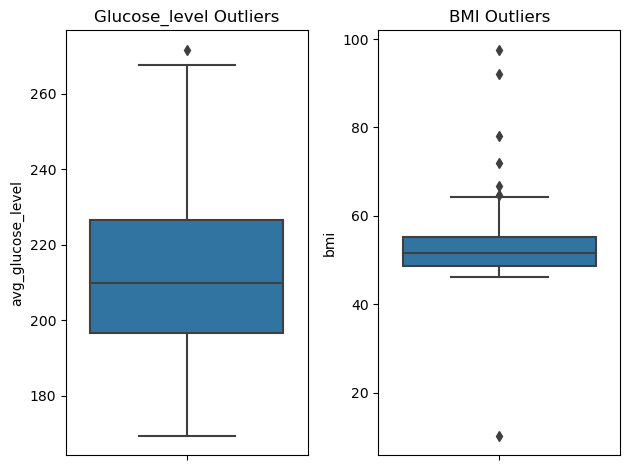

In [21]:
#Visualize
plt.subplot(1,2,1)
sns.boxplot(y = outliers_glucose)
plt.title('Glucose_level Outliers')

plt.subplot(1,2,2)
sns.boxplot(y = outliers_bmi)
plt.title('BMI Outliers')

plt.tight_layout()
plt.show()

Although after removing the outlier, there are still outliers left in the data. But, it is ok since the outlier is still acceptable because the value of the outliers did not exceed too much.

In [22]:
#Initiating a scaler standardizing estimator
scale = MinMaxScaler()

In [23]:
#Fit the features data only to this estimator and transform
scale.fit(df.drop('stroke', axis=1))
scale_features = scale.transform(df.drop('stroke', axis=1))

In [24]:
df_feat = pd.DataFrame(scale_features, columns=df.columns[:-1])

#normalize df_feat data
d = preprocessing.normalize(df_feat)
scaled_df = pd.DataFrame(d, columns=df.columns[:-1])
scaled_df.head()

scaled_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.000000,0.366700,0.000000,0.448896,0.448896,0.336672,0.448896,0.359684,0.135234,0.000000
1,0.270347,0.402088,0.000000,0.000000,0.540694,0.540694,0.000000,0.367143,0.115157,0.180231
2,0.000000,0.504124,0.000000,0.516740,0.516740,0.387555,0.000000,0.121182,0.131405,0.172247
3,0.250720,0.299444,0.000000,0.000000,0.501439,0.376080,0.501439,0.268775,0.138427,0.334293
4,0.232731,0.448417,0.465463,0.000000,0.465463,0.465463,0.000000,0.255702,0.073045,0.155154


Feature Selection

<AxesSubplot:>

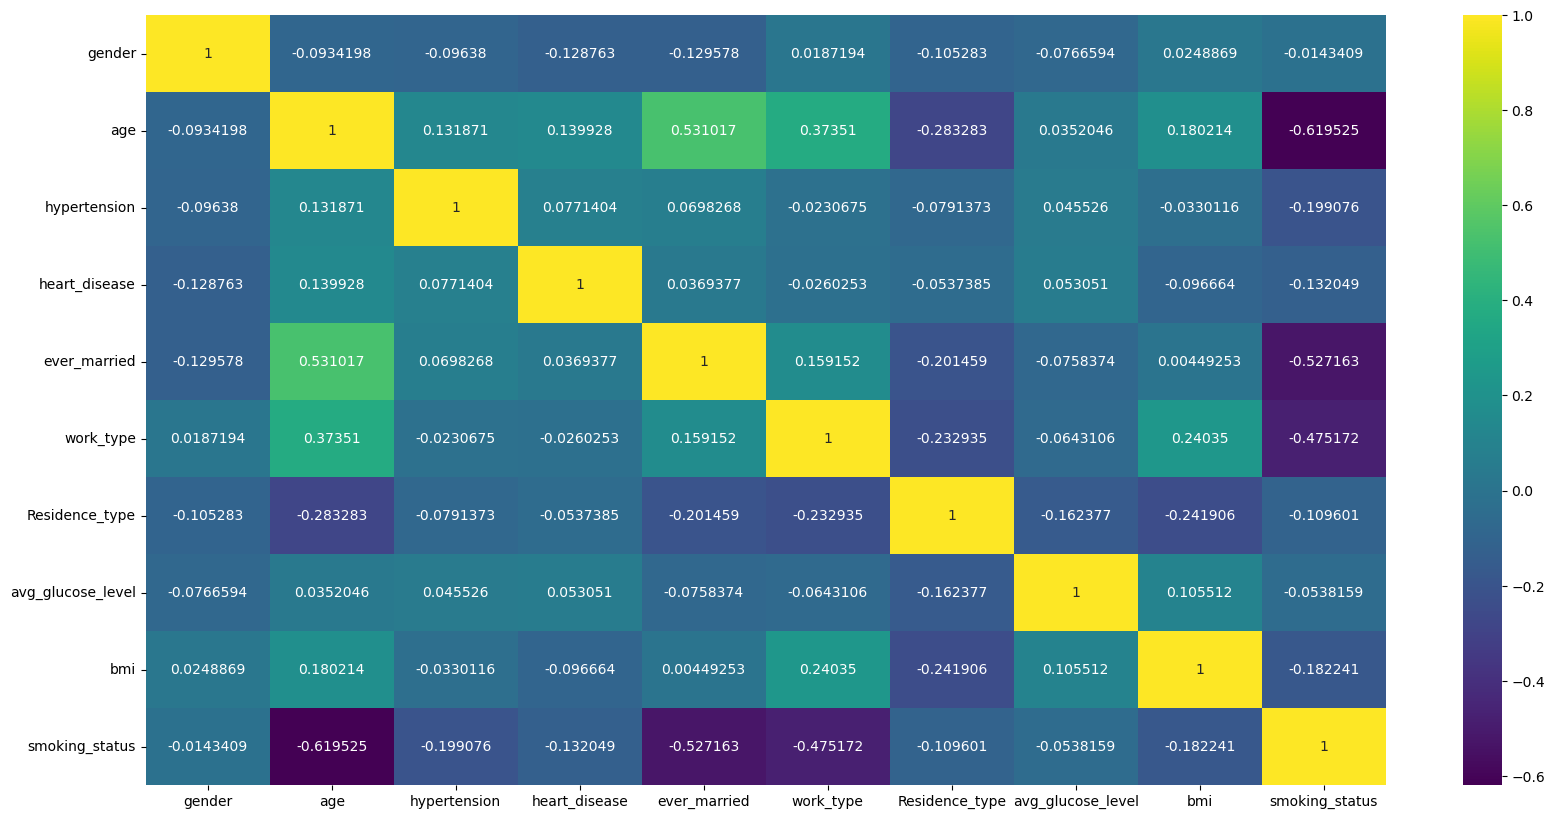

In [25]:
plt.figure(figsize=(20,10))
correlation = scaled_df.corr()
sns.heatmap(correlation, annot=True, fmt='g', cmap='viridis')

In [26]:
# Create the X y matrix
X = scaled_df[['bmi', 'avg_glucose_level']].values
y = df['stroke'].values

In [27]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X training set {}'.format(X_train.shape),
      'Shape of y training set {}'.format(y_train.shape))

Shape of X training set (4088, 2) Shape of y training set (4088,)


#### Data Modeling

In [28]:
#Function for evaluation to visualize confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##### Decision Tree

In [29]:
#Setting up decision tree with maxdepth = None
strokeTree = DecisionTreeClassifier(criterion='entropy', max_depth = None)

#Fit the training data (x_train and y_train)
strokeTree.fit(X_train, y_train)

#Prediction using X_test data
prediction = strokeTree.predict(X_test)

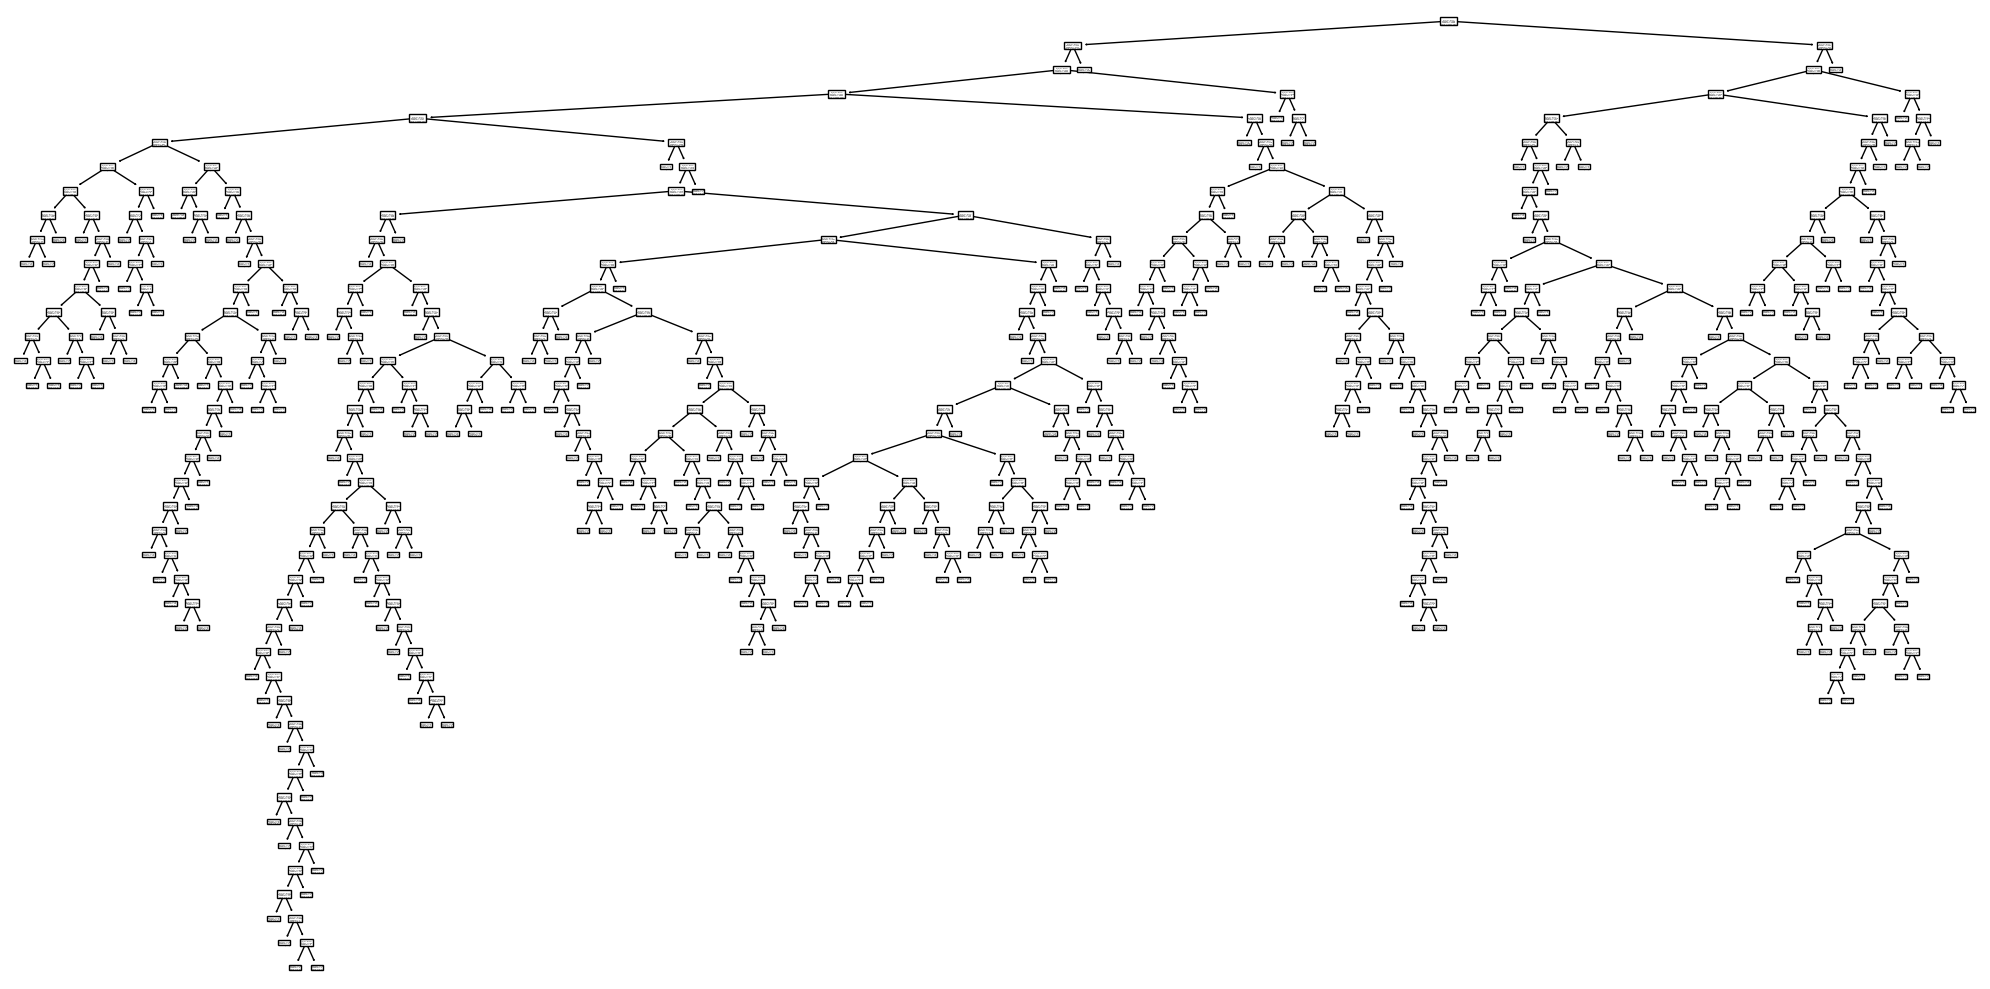

In [30]:
#Visualize the DecisionTree
#decision tree with max_depth = None
plt.figure(figsize=(20,10))
tree.plot_tree(strokeTree)
plt.tight_layout()
plt.show()

In [31]:
#Setting up decision tree with max_depth = 3
strokeTree = DecisionTreeClassifier(criterion='entropy', max_depth = 3)


#Fit the training data (x_train and y_train)
strokeTree.fit(X_train, y_train)

#Prediction using X_test data
prediction2 = strokeTree.predict(X_test)

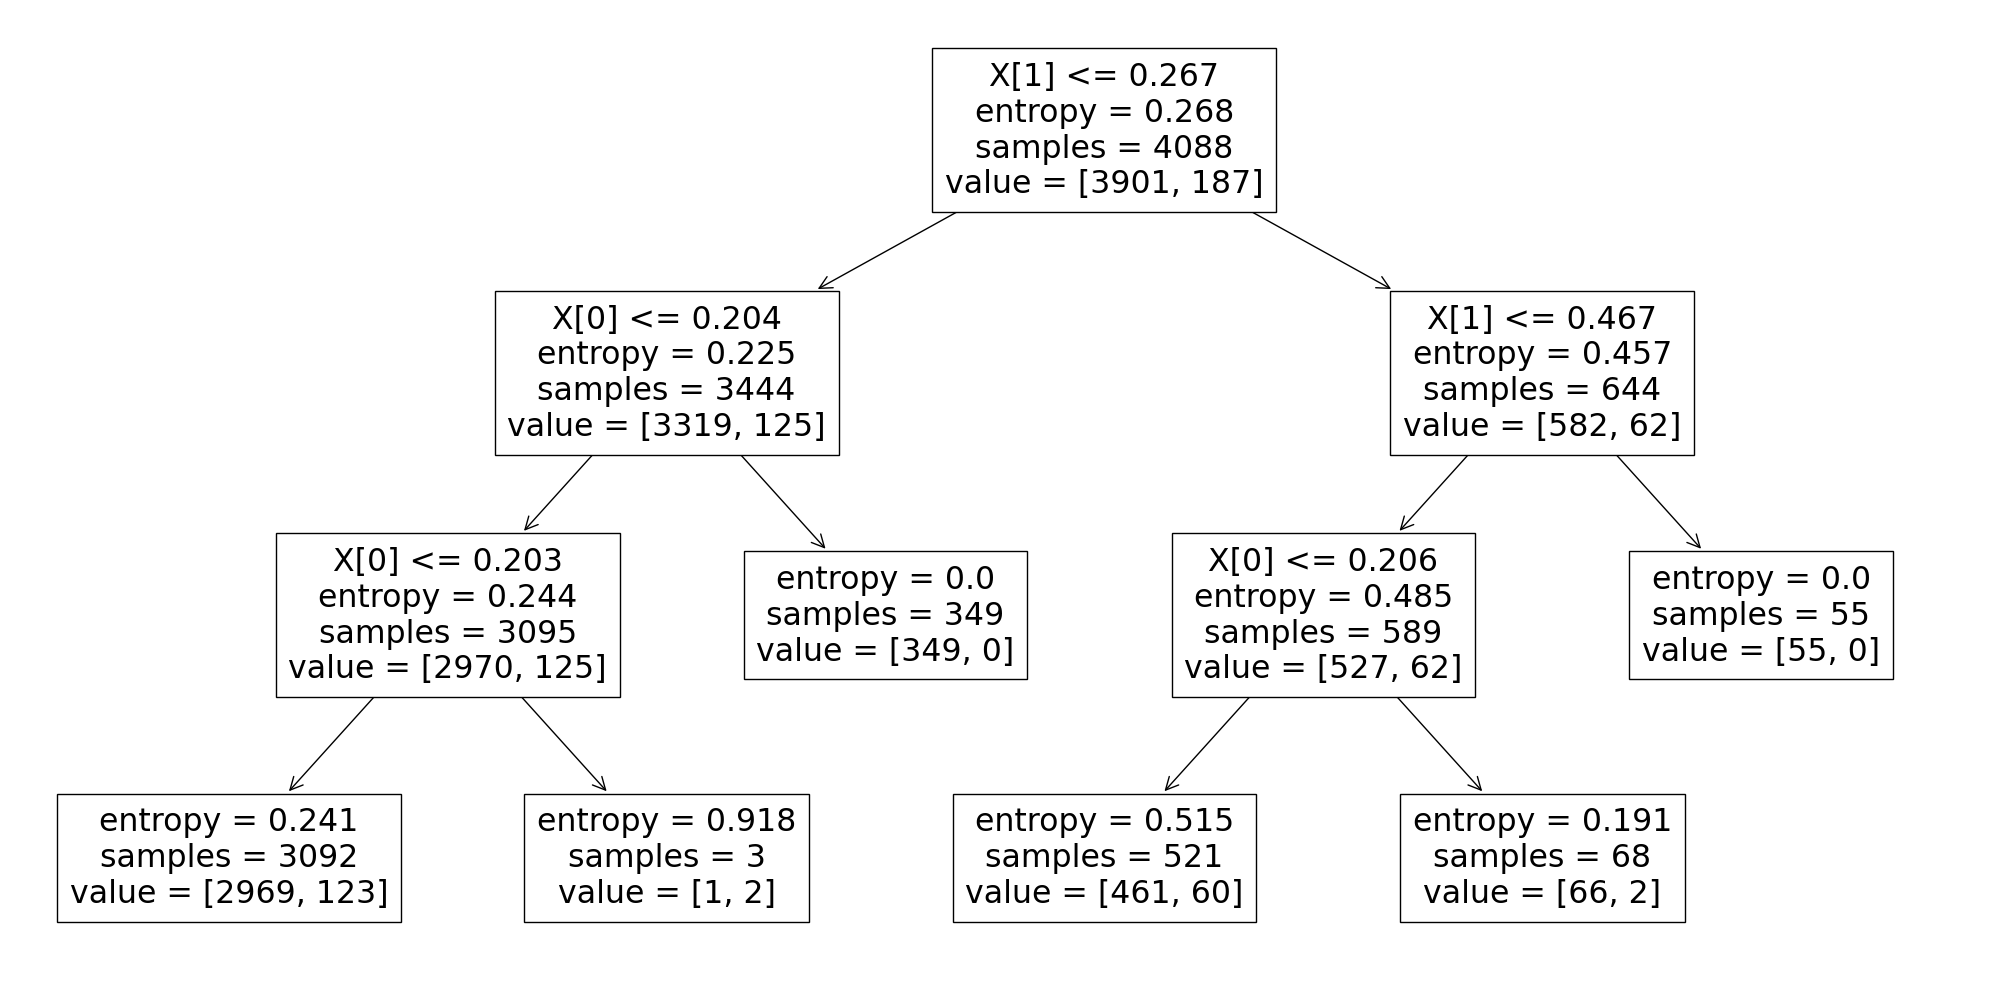

In [32]:
#Visualize the DecisionTree
#decision tree with max_depth = 3
plt.figure(figsize=(20,10))
tree.plot_tree(strokeTree)
plt.tight_layout()
plt.show()

DecisionTree's Accuracy:  0.8972602739726028
DecisionTree's Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       960
           1       0.06      0.05      0.05        62

    accuracy                           0.90      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.89      0.90      0.89      1022

Confusion matrix, without normalization
[[959   1]
 [ 62   0]]


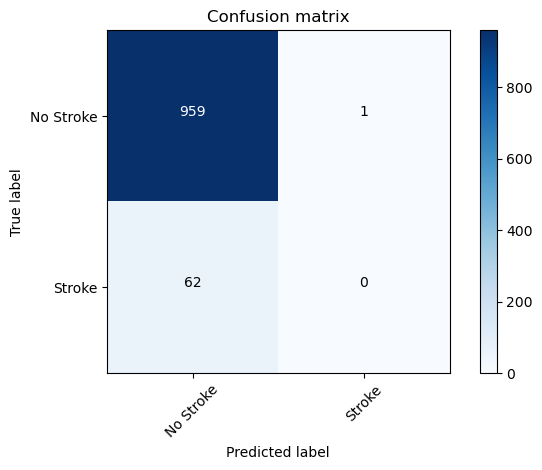

In [33]:
#Evaluation
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_test, prediction))
cnf1 = confusion_matrix(y_test, prediction2)

print("DecisionTree's Classification Report: \n", classification_report(y_test, prediction))
plot_confusion_matrix(cnf1, classes=["No Stroke", "Stroke"], normalize=False)
plt.tight_layout()

From the confusion matrix above, the true positive value of confusion matrix is 2318, true negative is 20, false positive is 102, false negative is 115. It means that from 2555 sample, the decision tree model has an error rate about 10% from the sample. The true positive and true negative are the area where the decision tree model predict accurately, whereas the false positve and false negative is the area where the error happens on the decision tree model.

##### Support Vector Machine (SVM)

In [34]:
# Plot SVM boundaries
def plot_svc_decision_function(model, ax=None, plot_support=True) :
    """Plot the decision function for a 2D svc"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape (X.shape)

    # plot decision boundary and margins

    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [35]:
#SVM Modeling
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [36]:
#SVM Prediction
yhat = clf.predict(X_test)
yhat[0:5]
#check if all values of yhat = 0
#print(np.all(yhat < 1)) #Check if there is yhat value that less than 1
#print(np.all(yhat > 0)) #Check if there is yhat value that greater than 0
#print(np.all(yhat < 0)) #Check if there is yhat value that less than 0

array([0, 0, 0, 0, 0], dtype=int64)

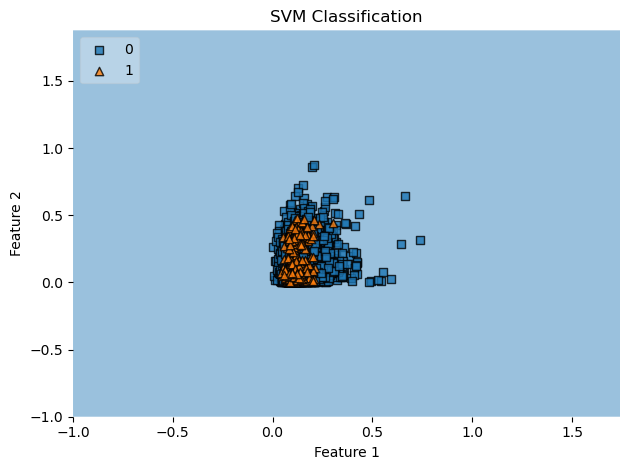

In [37]:
# plot the decision regions
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=clf, legend=2)

# add axis labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification')

# show the plot
plt.tight_layout()
plt.show()

SVM's Accuracy:  0.9393346379647749
SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion matrix, without normalization
[[960   0]
 [ 62   0]]


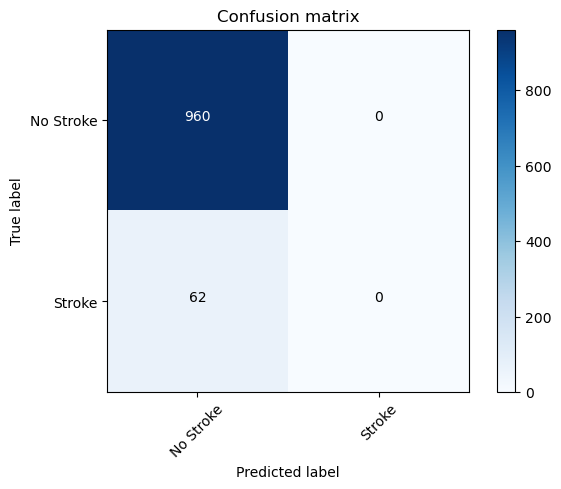

In [38]:
#Evaluation
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat))
cnf2 = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print("SVM Classification Report: \n", classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf2, classes=["No Stroke", "Stroke"], normalize=False)

From the confusion matrix above, the actual positive value is labeled as No Stroke and the negative value is labeled as stroke. The true positive value of confusion matrix is 2433, true negative is 0, false positive is 122, false negative is 0. It means that from 2555 sample, the decision tree model has an error rate about 6% from the sample. 